In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv('acquiredDataset.csv')

In [10]:
df.head()

,attention,meditation,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,highGamma,classification
0,26,34,960462,277180,26575,27356,26575,13056,9126,2683,0
1,29,54,39145,28225,20172,39551,20172,9933,5237,4750,0
2,40,48,75410,43144,8601,13564,8601,11663,2515,3251,0
3,66,47,16057,41211,2534,34254,2534,27663,11396,2825,0
4,81,67,10304,47239,33158,47349,33158,16328,5298,5471,0


In [20]:
df['classification'].value_counts()

classification
0    2135
1    1600
Name: count, dtype: int64

In [22]:
X = df.drop('classification' , axis = 1)
y = df['classification']

In [24]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf = RandomForestClassifier(n_estimators=1000)

In [34]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [36]:
pred = rf.predict(X_test)

In [38]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
metrics.mean_absolute_error(pred,y_test)

0.19625334522747548

In [42]:
metrics.mean_squared_error(pred,y_test)

0.19625334522747548

In [44]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       700
           1       0.72      0.78      0.75       421

    accuracy                           0.80      1121
   macro avg       0.79      0.80      0.79      1121
weighted avg       0.81      0.80      0.81      1121



Text(0, 0.5, 'Actual Outcomes')

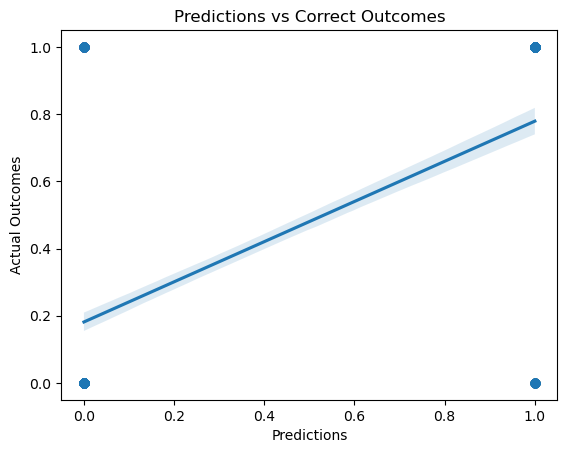

In [46]:
plt.figure()
sns.regplot(x = pred , y = y_test)
plt.title('Predictions vs Correct Outcomes')
plt.xlabel('Predictions')
plt.ylabel('Actual Outcomes')